In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Make the dataset
# Utilizziamo dati sintetici, generati da algoritmi, utilizziamo dei clustering

N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements the function:

  y=cos( 2x[0] )+cos( 3x[1] )

Absolutely non linear

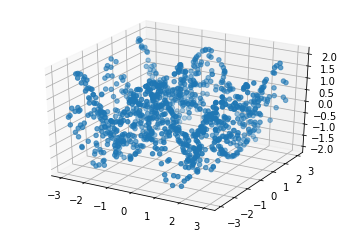

In [ ]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

#Se lo plottassi su script python potrei ruotare e visualizzare meglio i dati

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9796
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9367
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9058
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8946
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8739
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7673
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7107
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6742
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6156
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5813
Epoch 11/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5834
Epoch 12/100
32/32 [==============================] - 0s 9ms/step - loss: 0.5340
Epoch 13/100
32/32 [=================

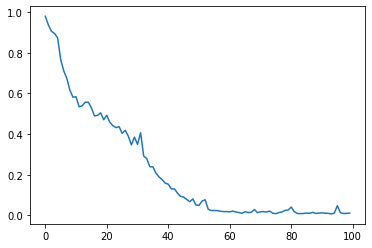

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

# Compile and fit

# Qua Adam meglio se cambiamo il learning rate
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

# Plot the loss
plt.plot(r.history['loss'], label='loss')


79/79 [==============================] - 0s 1ms/step


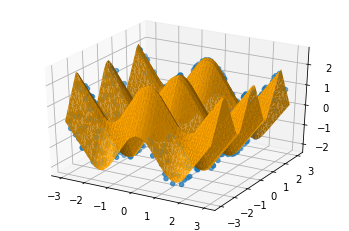

In [ ]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
#prendo 50 punti equispaziati tra [-3,3] 
# e meshgrid moltiplica questi punti tra loro e ottengo gli assi xx yy
xx, yy = np.meshgrid(line, line)
# qua otteniamo un array verticale dei dati, gli input xx e yy vengono "stacked" gli uni sugli altri (con T portiamo ad orizzontale)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

#Prediciamo l'output
Yhat = model.predict(Xgrid).flatten()

ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True,color='orange')
plt.show()

Quindi possiamo utilizare il modello per approssimare una funzione non lineare, senza alcun coseno in pratica!

79/79 [==============================] - 0s 1ms/step


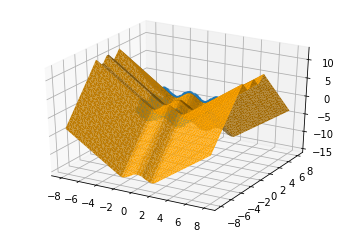

In [ ]:
# Can it extrapolate?
#Proviamo a estrapolare dati, prevedere l'andamento su un range di input non "studiato" ma non funziona
#perche interpola linearmente agli estremi

# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-8, 8, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True, color='orange')
plt.show()
